In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sympy as sp

In [2]:
df = pd.read_csv('players_21.csv')
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
print("Shape:",df.shape)
print("Columns:", df.columns.tolist())
print("Data Type:")
print(df.dtypes)

Shape: (18944, 106)
Columns: ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'move

In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64


In [5]:
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
0


In [6]:
print("Numerical Summary:")
print(df.describe())
print("\nCategorical Summary:")
print(df.describe(include=['object']))

Numerical Summary:
           sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18944.000000  18944.000000  18944.000000  18944.000000  18719.000000   
mean   226242.402872     25.225823    181.190773     75.016892      1.357070   
std     27171.091056      4.697354      6.825672      7.057140      0.739327   
min        41.000000     16.000000    155.000000     50.000000      1.000000   
25%    210030.500000     21.000000    176.000000     70.000000      1.000000   
50%    232314.500000     25.000000    181.000000     75.000000      1.000000   
75%    246760.250000     29.000000    186.000000     80.000000      1.000000   
max    258970.000000     53.000000    206.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18944.000000  18944.000000  1.894400e+04   18944.000000   
mean      65.677787     71.086729  2.224813e+06    8675.852513   
std        7.002278      6.109985  5.102486e+06   19654.774894

In [7]:
num_clubs=df['club_name'].nunique()
print(f"No of unique clubs:{num_clubs}")

No of unique clubs:681


In [8]:
num_nationalities=df['nationality'].nunique()
print(f"No of unique nationalities:{num_nationalities}")

No of unique nationalities:162


In [9]:
common_nationality=df['nationality'].mode()[0]
print(f"Most common nationality:{common_nationality}")

Most common nationality:England


In [10]:
highest_overall=df['overall'].max()
print(f"Highest overall rating:{highest_overall}")

Highest overall rating:93


In [11]:
top_players=df[df['overall']==highest_overall][['long_name','overall','club_name','nationality']]
print(f"top players:\n{top_players.to_string(index=False)}")

top players:
                     long_name  overall    club_name nationality
Lionel Andrés Messi Cuccittini       93 FC Barcelona   Argentina


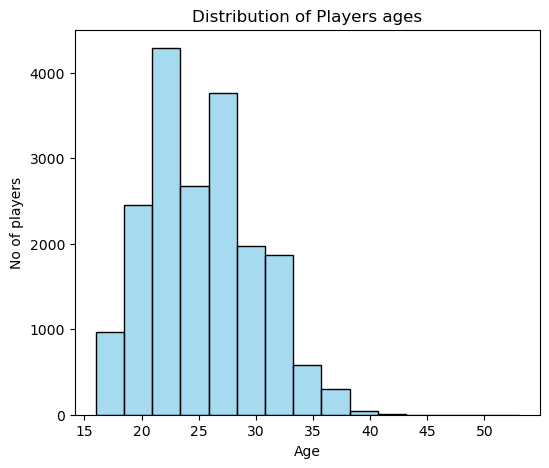

In [12]:
plt.figure(figsize=(6,5))
sns.histplot(df['age'],bins=15,color='skyblue')
plt.title('Distribution of Players ages')
plt.xlabel('Age')
plt.ylabel('No of players')
plt.show()

In [13]:
top_10=df.nlargest(10,'overall')[['long_name','overall','club_name','nationality']]
print(f"Top 10 players:\n{top_10.to_string(index=False)}")

Top 10 players:
                          long_name  overall           club_name nationality
     Lionel Andrés Messi Cuccittini       93        FC Barcelona   Argentina
Cristiano Ronaldo dos Santos Aveiro       92            Juventus    Portugal
                          Jan Oblak       91     Atlético Madrid    Slovenia
                 Robert Lewandowski       91   FC Bayern München      Poland
      Neymar da Silva Santos Júnior       91 Paris Saint-Germain      Brazil
                    Kevin De Bruyne       91     Manchester City     Belgium
               Kylian Mbappé Lottin       90 Paris Saint-Germain      France
              Marc-André ter Stegen       90        FC Barcelona     Germany
                    Virgil van Dijk       90           Liverpool Netherlands
              Alisson Ramsés Becker       90           Liverpool      Brazil


In [14]:
avg_age_per_club=df.groupby('club_name')['age'].mean().sort_values(ascending=False)
print(f"Average age per club:\n{avg_age_per_club}")

Average age per club:
club_name
Qingdao Huanghai F.C.            29.360000
Shanghai Greenland Shenhua FC    29.115385
Al Fayha                         29.090909
AC Mineros de Guayana            29.040000
Yokohama FC                      29.033333
                                   ...    
Lincoln City                     21.925926
AFC Wimbledon                    21.607143
SC Heerenveen                    21.347826
Bayern München II                20.714286
FC Nordsjælland                  20.703704
Name: age, Length: 681, dtype: float64


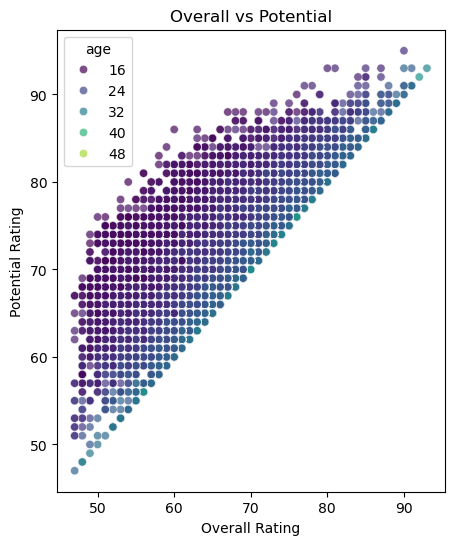

In [15]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=df, x='overall', y='potential', hue='age', palette='viridis', alpha=0.7)
plt.title('Overall vs Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.show()


In [16]:
top10_wage_nat = (df.groupby('nationality')['wage_eur'].mean().sort_values(ascending=False).head(10))

print(top10_wage_nat)


nationality
Tanzania                    55000.000000
Bermuda                     33000.000000
Dominican Republic          33000.000000
Saint Kitts and Nevis       30500.000000
Armenia                     23500.000000
Gabon                       23046.875000
Algeria                     21442.307692
Syria                       19487.500000
Egypt                       15827.586207
Central African Republic    15250.000000
Name: wage_eur, dtype: float64


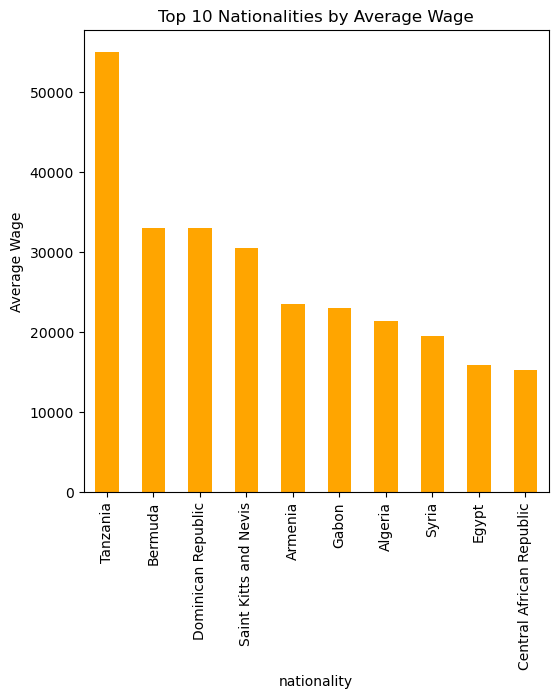

In [17]:
top10_wage_nat.plot(kind='bar', color='orange', figsize=(6,6))
plt.ylabel('Average Wage')
plt.title('Top 10 Nationalities by Average Wage')
plt.show()


In [18]:
mean_overall = df['overall'].mean()
median_overall = df['overall'].median()
mode_overall = df['overall'].mode()[0]
print(f"Mean Overall: {mean_overall}")
print(f"Median Overall: {median_overall}")
print(f"Mode Overall: {mode_overall}")


var_overall = df['overall'].var()
std_overall = df['overall'].std()
print(f"Variance of Overall: {var_overall}")
print(f"Standard Deviation of Overall: {std_overall}")

correlation = df['age'].corr(df['overall'])
print(f"Correlation between Age and Overall: {correlation}")

total_players = len(df)
high_potential = len(df[df['potential'] > 85])
percentage = (high_potential / total_players) * 100
print(f"Percentage of players with potential > 85: {percentage:.2f}%")


Mean Overall: 65.67778716216216
Median Overall: 66.0
Mode Overall: 65
Variance of Overall: 49.03189636477323
Standard Deviation of Overall: 7.0022779411255325
Correlation between Age and Overall: 0.46819673362728537
Percentage of players with potential > 85: 1.37%


In [19]:
overall = df['overall'].to_numpy()
potential = df['potential'].to_numpy()

print("Overall array:", overall[:10])
print("\nPotential array:", potential[:10])
diff = potential - overall
print("\nDifference (Potential - Overall) for first 10 players:", diff[:10])

dot_product = np.dot(overall, potential)
print("\nDot product of Overall and Potential:", dot_product)

norm_overall = overall / np.linalg.norm(overall)
print("\nNormalized Overall (first 10 values):", norm_overall[:10])
overall, potential = sp.symbols('overall potential')
Performance_Score = overall**2 + 0.5 * potential

derivative = sp.diff(Performance_Score, overall)
print("\nDerivative of Performance_Score w.r.t overall:", derivative)



Overall array: [93 92 91 91 91 91 90 90 90 90]

Potential array: [93 92 93 91 91 91 95 93 91 91]

Difference (Potential - Overall) for first 10 players: [0 0 2 0 0 0 5 3 1 1]

Dot product of Overall and Potential: 88961854

Normalized Overall (first 10 values): [0.01022997 0.01011997 0.01000997 0.01000997 0.01000997 0.01000997
 0.00989997 0.00989997 0.00989997 0.00989997]

Derivative of Performance_Score w.r.t overall: 2*overall


In [20]:
elite_players = df[df['overall'] > 85]
print("Players with overall > 85:\n", elite_players[['long_name','overall','club_name','nationality']].head(10))

top_value_players = df.sort_values(by='value_eur', ascending=False)
print("\nTop players by market value:\n", top_value_players[['long_name','value_eur','overall']].head(10))

players_per_nation = df.groupby('nationality').size().sort_values(ascending=False)
print("\nNumber of players per nationality:\n", players_per_nation.head(10))

top5_clubs = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 clubs by average overall:\n", top5_clubs)

forward_count = df[df['player_positions'].str.contains('Forward')].shape[0]
print("\nNumber of players with 'Forward' in positions:", forward_count)


Players with overall > 85:
                              long_name  overall            club_name  \
0       Lionel Andrés Messi Cuccittini       93         FC Barcelona   
1  Cristiano Ronaldo dos Santos Aveiro       92             Juventus   
2                            Jan Oblak       91      Atlético Madrid   
3                   Robert Lewandowski       91    FC Bayern München   
4        Neymar da Silva Santos Júnior       91  Paris Saint-Germain   
5                      Kevin De Bruyne       91      Manchester City   
6                 Kylian Mbappé Lottin       90  Paris Saint-Germain   
7                Marc-André ter Stegen       90         FC Barcelona   
8                      Virgil van Dijk       90            Liverpool   
9                Alisson Ramsés Becker       90            Liverpool   

   nationality  
0    Argentina  
1     Portugal  
2     Slovenia  
3       Poland  
4       Brazil  
5      Belgium  
6       France  
7      Germany  
8  Netherlands  
9       B

In [21]:
max_value = df['value_eur'].max()
most_valuable_player = df[df['value_eur'] == max_value][['long_name', 'club_name', 'value_eur']]
print("Player(s) with highest market value:\n", most_valuable_player)

top_club = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(1)
print("\nClub with highest average overall rating:\n", top_club)

top_nationality = df['nationality'].value_counts().head(1)
print("\nNationality with most players:\n", top_nationality)

correlation = df['potential'].corr(df['overall'])
print(f"\nCorrelation between potential and overall: {correlation:.2f}")

elite_percentage = (df[df['overall'] >= 85].shape[0] / len(df)) * 100
print(f"\nPercentage of elite players (overall ≥ 85): {elite_percentage:.2f}%")



Player(s) with highest market value:
               long_name            club_name  value_eur
6  Kylian Mbappé Lottin  Paris Saint-Germain  105500000

Club with highest average overall rating:
 club_name
FC Bayern München    81.045455
Name: overall, dtype: float64

Nationality with most players:
 nationality
England    1685
Name: count, dtype: int64

Correlation between potential and overall: 0.64

Percentage of elite players (overall ≥ 85): 0.52%
